# Домашнее Задание 5.
Дедлайн - 21 июня 23:59 по МСК (GMT+3) или 24 часа до экзамена

Форма сдачи - jupyter notebook. Сдавать в [классрум](https://classroom.google.com/c/NjYxNjY4MjY3NDIw?cjc=pho754c)

In [5]:
import numpy as np
import scipy.special
import matplotlib
matplotlib.rcParams['image.cmap'] = 'jet'
import matplotlib.pyplot as plt
from numba import jit

# Задача 1 (3 балла)
Пусть задана функция:
$$
f(x) = \cos(x)
$$

Напишете функцию, которая вычисляет первые и вторые производные данной функции в произвольной точке.


Для первых производных используйте формулу первого и второго порядка
$$
f^\prime(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$
$$
f^\prime(x) \approx \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}
$$
$$
f^{\prime\prime}(x) \approx \frac{f(x + \Delta x) + f(x - \Delta x) - 2 f(x)}{\Delta x^2}
$$
Постройте график зависимости ошибки вычисления производных тремя данными методвами как функцию $\Delta x$.
Точнее график логарифма ошибки $\log(r)$ от $\log(\Delta x)$ для некоторой точки, отличной от $k \pi/2, k \in \mathbb{Z}$. Соответствует ли наклон прямой порядку метода?

In [34]:
def f(x):
    return np.cos(x)

def f_prime_exact(x):
    return -np.sin(x)

def f_double_prime_exact(x):
    return -np.cos(x)

def f_prime_first_order(x, dx):
    return (f(x + dx) - f(x)) / dx

def f_prime_second_order(x, dx):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def f_double_prime_second_order(x, dx):
    return (f(x + dx) + f(x - dx) - 2 * f(x)) / dx**2

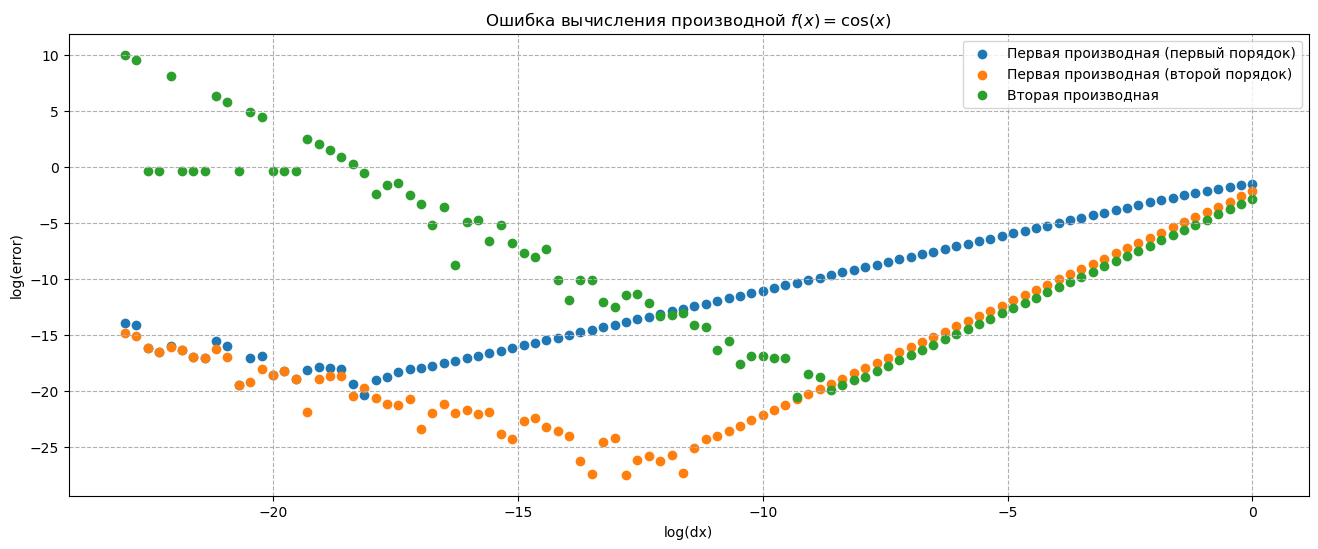

In [52]:
# Для точки x = np.pi / 4
def compute_errors(x, dx_values):
    errors_first_order = []
    errors_second_order = []
    errors_double_prime = []
    
    for dx in dx_values:
        error_first = np.abs(f_prime_first_order(x, dx) - f_prime_exact(x))
        error_second = np.abs(f_prime_second_order(x, dx) - f_prime_exact(x))
        error_double = np.abs(f_double_prime_second_order(x, dx) - f_double_prime_exact(x))
        
        errors_first_order.append(error_first)
        errors_second_order.append(error_second)
        errors_double_prime.append(error_double)
    
    return errors_first_order, errors_second_order, errors_double_prime

dx_values = np.logspace(-10, 0, 100)
x = np.pi / 4

errors_first_order, errors_second_order, errors_double_prime = compute_errors(x, dx_values)

plt.figure(figsize=(16, 6))
plt.scatter(np.log(dx_values), np.log(errors_first_order), label="Первая производная (первый порядок)")
plt.scatter(np.log(dx_values), np.log(errors_second_order), label="Первая производная (второй порядок)")
plt.scatter(np.log(dx_values), np.log(errors_double_prime), label="Вторая производная")

plt.xlabel("log(dx)")
plt.ylabel("log(error)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title("Ошибка вычисления производной $f(x) = \cos(x)$")
plt.show()

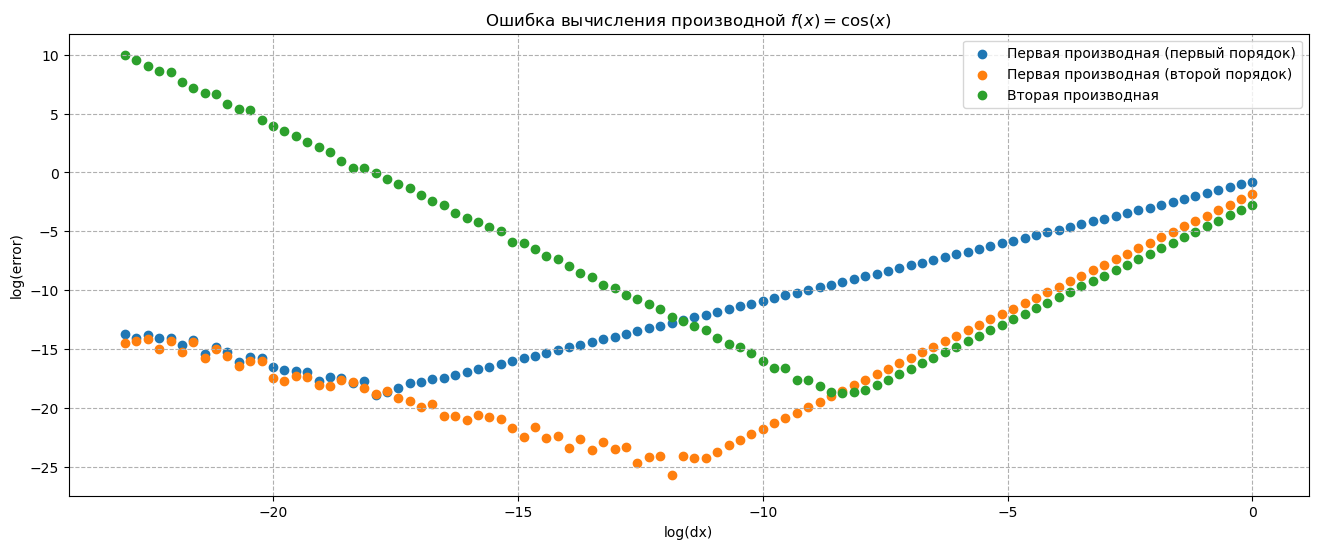

In [53]:
# Для отрезка [1.5, 2.5]
def compute_accuracy(dx):
    numx = 101
    xmin = 1.5
    xmax = 2.5
    x = np.linspace(xmin, xmax, numx)

    dydx_exact_0 = f_prime_exact(x)
    dydx_numer_1 = f_prime_first_order(x, dx)
    dydx_numer_2 = f_prime_second_order(x, dx)
    dydx_numer_3 = f_double_prime_second_order(x, dx)
    r1 = np.max(np.absolute(dydx_numer_1 - dydx_exact_0))
    r2 = np.max(np.absolute(dydx_numer_2 - dydx_exact_0))
    r3 = np.max(np.absolute(dydx_numer_3 - f_double_prime_exact(x)))
    return (r1, r2, r3)


dx_values = np.logspace(-10, 0, 100)


r1_values = []
r2_values = []
r3_values = []

for dx in dx_values:
    r1, r2, r3 = compute_accuracy(dx)
    r1_values.append(r1)
    r2_values.append(r2)
    r3_values.append(r3)


plt.figure(figsize=(16, 6))
plt.scatter(np.log(dx_values), np.log(r1_values), label="Первая производная (первый порядок)")
plt.scatter(np.log(dx_values), np.log(r2_values), label="Первая производная (второй порядок)")
plt.scatter(np.log(dx_values), np.log(r3_values), label="Вторая производная")

plt.xlabel("log(dx)")
plt.ylabel("log(error)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title("Ошибка вычисления производной $f(x) = \cos(x)$")
plt.show()

# Задача 2 (3 балла)
Пусть задана функция: 
$$
f(x) = \cos(x)
$$

Реализуйте сами (библиотеки не считаются) функцию, которая вычисляет определенный интергал:
$$
I(a, b) = \int_{a}^{b} \cos(x) dx
$$
методом трапеций для произвлольных $a, b$.

Зафиксируйте $a, b$. Как ведет себя ошибка вычисления интеграла $r(n)$ от числа сегментов $n$, на которые разбивается интервал интегрирования в рассматриваемом алгоритме.

Лучше построить график в логарифмческих координатах: $\log(r(n))$ как функция $\log(n)$.

In [54]:
def f(x):
    return np.cos(x)

def exact_integral(a, b):
    return np.sin(b) - np.sin(a)

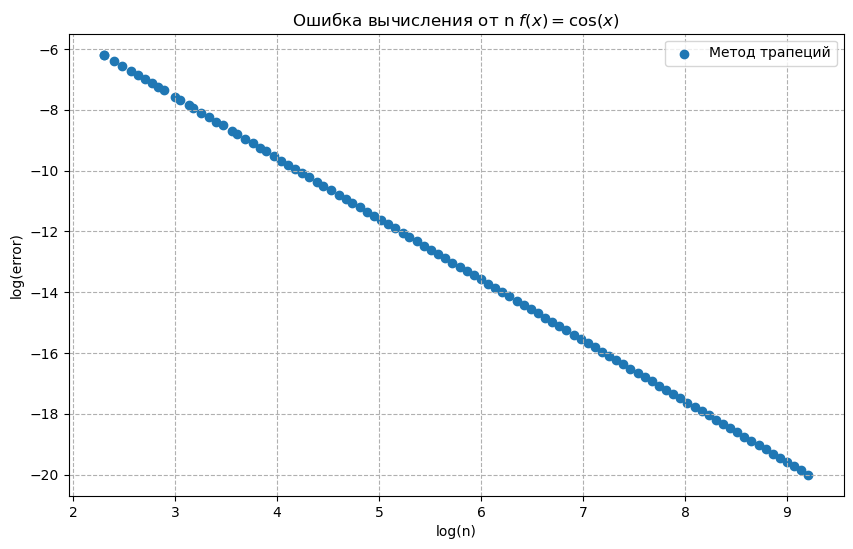

In [56]:
def trapezoidal_integral(a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

def compute_errors(a, b, n_values):
    exact_value = exact_integral(a, b)
    errors = []
    
    for n in n_values:
        approx_value = trapezoidal_integral(a, b, n)
        error = np.abs(approx_value - exact_value)
        errors.append(error)
    
    return errors

n_values = np.logspace(1, 4, 100, dtype=int)
a, b = 0, np.pi / 2

errors = compute_errors(a, b, n_values)

plt.figure(figsize=(10, 6))
plt.scatter(np.log(n_values), np.log(errors), label="Метод трапеций")

plt.xlabel("log(n)")
plt.ylabel("log(error)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title("Ошибка вычисления от n $f(x) = \cos(x)$")
plt.show()

# Задача 3 (2 балла)
Пусть задана функция: 
$$
f(x) = \cos(x)
$$

Реализуйте сами (библиотеки не считаются) функцию, которая вычисляет определенный интергал:
$$
I(a, b) = \int_{a}^{b} \cos(x) dx
$$
квадратур на многочленах Лежандра для произвлольных $a, b$.

Для нескольких порядков правила квадратур постройте график зависимости ошибки метода $r(n)$ от числа сегментов $n$, на которые разбивается интервал интегрирования в рассматриваемом алгоритме.

Лучше построить график в логарифмческих координатах: $\log(r(n))$ как функция $\log(n)$.

In [62]:
def f(x):
    return np.cos(x)

def exact_integral(a, b):
    return np.sin(b) - np.sin(a)

fmean_exact = 1.682941969615793
fmean_quadr = 1.6829419696157932
res = 2.220446049250313e-16


/var/folders/fz/v54zc99901z8xy9l3zwwx4140000gn/T/ipykernel_44185/996337119.py:68: RuntimeWarning: divide by zero encountered in log
  plt.scatter(n * np.log(n), np.log(r), c='b')
/var/folders/fz/v54zc99901z8xy9l3zwwx4140000gn/T/ipykernel_44185/996337119.py:69: RuntimeWarning: divide by zero encountered in log
  plt.scatter(n * np.log(np.max(n)), np.log(r), c='r')


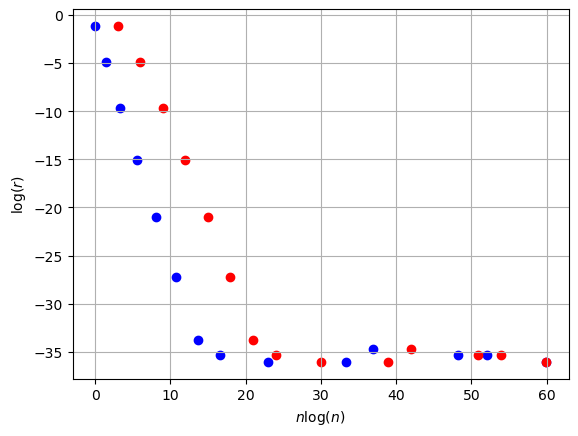

In [64]:
def legendre_poly(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n - 1) * x * legendre_poly(n - 1, x) - (n - 1) * legendre_poly(n - 2, x)) / n

def legendre_poly_deriv(n, x):
    return n / (x**2 - 1) * (x * legendre_poly(n, x) - legendre_poly(n - 1, x))

def legendre_roots_and_weights(n):
    roots = np.zeros(n)
    weights = np.zeros(n)
    for i in range(1, n + 1):
        x = np.cos(np.pi * (i - 0.25) / (n + 0.5))  # Initial guess
        for _ in range(100):  # Newton's method
            dx = -legendre_poly(n, x) / legendre_poly_deriv(n, x)
            x += dx
            if abs(dx) < 1e-12:
                break
        roots[i - 1] = x
        weights[i - 1] = 2 / ((1 - x**2) * (legendre_poly_deriv(n, x))**2)
    return roots, weights

def compute_integral_quadrature_rule(xmin, xmax, n=3):
    t, w = legendre_roots_and_weights(n)
    w = w / np.sum(w)
    x = 0.5 * (xmin + xmax) + 0.5 * (xmax - xmin) * t
    y = f(x)
    return (xmax - xmin) * np.sum(w * y)

def compute_integral_compositino(xmin, xmax, ndomain, nquad=3):
    s = 0.0
    xbound = np.linspace(xmin, xmax, ndomain + 1)
    for idx in range(ndomain):
        s += compute_integral_quadrature_rule(xbound[idx], xbound[idx + 1], n=nquad)
    return s

def compute_residual(xmin, xmax, n):
    fmean_exact = exact_integral(xmin, xmax)
    fmean_quadr = compute_integral_quadrature_rule(xmin, xmax, n=n)
    res = fmean_quadr - fmean_exact
    return np.absolute(res)

def compute_r_vs_n(xmin, xmax, nmax=30):
    n = np.linspace(1, nmax, nmax, dtype=np.int64)
    r = np.zeros((nmax))
    for idx in range(nmax):
        r[idx] = compute_residual(xmin, xmax, n[idx])
    return (n, r)

n = 20
xmin = -1.0
xmax = 1.0

fmean_exact = exact_integral(xmin, xmax)
fmean_quadr = compute_integral_quadrature_rule(xmin, xmax, n=n)

print('fmean_exact = ' + str(fmean_exact))
print('fmean_quadr = ' + str(fmean_quadr))
res = fmean_quadr - fmean_exact
print('res = ' + str(res))

n, r = compute_r_vs_n(xmin, xmax, nmax=20)

plt.figure()
plt.scatter(n * np.log(n), np.log(r), c='b')
plt.scatter(n * np.log(np.max(n)), np.log(r), c='r')
plt.xlabel(r'$n \log(n)$')
plt.ylabel(r'$\log(r)$')
plt.grid()
plt.show()

# Задача 4 (1 балл)
Пусть задана функция: 
$$
f(x) = \cos(1.1 x_0) \cos(1.2 x_1)
$$
на квадрате $Q = [-1; 1] \times [-1; 1]$.

Используйте многомерное правило квадратур (для многочленов Лежандра) для вычисления интерала:
$$
\int_{Q} f(x) dx_0 dx_1
$$

Как ведет себя ошибка интешрирования с ростом числа узлов правила квадратур?
Можете использовать любое рассмотренное в курсе правило квадратур.

# Задача 5 (1 балл)
В задаче 4 из домашнего задания 3 реализуйте функцию, которая вычисляет частную производную
$$
\frac{\partial \log\big(p_{\text{evidence}}(\mathbf{y} | \sigma)\big)}{\partial \sigma}
$$
методом MCMC по алгоритму Метрополиса-Хастингса (MCMC).
Вычисление частной производной может быть выполнено при помощи интегрировагия по постериорному распределению:

$$
\frac{\partial \log\big(p_{\text{evidence}}(\mathbf{y} | \sigma)\big)}{\partial \sigma} = \int \frac{\partial \log\big( p_{\text{likelihood}}(y | x, \sigma) \big)}{\partial \sigma} p_{\text{posterior}}(x | y, \sigma) dx
$$

Генерируйте стартовую точку из априорного разспеределния $p_{\text{prior}}$.
Настройте шаг, длину цепи и burn-out.


Важно, что в алгоритме Метрополиса-Хастингса плотность вероятности можно знать с точностью до множителя, поэтому вместо $p_{\text{posterior}}$ можно использовать $p_{\text{\likelihood}}(y | x, \sigma) p_{\text{prior}}(x)$.


Используя метод стохастического градиентного подъема, вычислите оптимальное значение $\sigma$. Сравните его с решением, полученным в задаче 4, задания 3.

Фактически, в задаче требуется воспользоваться другим алгоритмом для вычисления градиента (притворились, что не умеем вычислять его аналитически) и оптимизации.